In [1]:
import json 
import os
import csv 
import time
import calendar
import datetime as dt
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
from pywaffle import Waffle 
import numpy as np
import seaborn as sns 

In [2]:
print(plt.style.available)
plt.style.use('ggplot')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
df = pd.read_csv('Urban_Park_Ranger_Animal_Condition_Response_20251107.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6385 entries, 0 to 6384
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date and Time of initial call     6385 non-null   object 
 1   Date and time of Ranger response  6385 non-null   object 
 2   Borough                           6385 non-null   object 
 3   Property                          6384 non-null   object 
 4   Location                          6343 non-null   object 
 5   Species Description               6382 non-null   object 
 6   Call Source                       6385 non-null   object 
 7   Species Status                    6324 non-null   object 
 8   Animal Condition                  5685 non-null   object 
 9   Duration of Response              6385 non-null   float64
 10  Age                               6385 non-null   object 
 11  Animal Class                      6385 non-null   object 
 12  311SR 

## Setting column data types

In [4]:
df[["Date and Time of initial call","Date and time of Ranger response"]].head()

,Date and Time of initial call,Date and time of Ranger response
0,06/23/2021 04:45:00 PM,06/24/2021 08:00:00 AM
1,06/24/2021 10:00:00 AM,06/24/2021 11:00:00 AM
2,06/23/2021 02:30:00 PM,06/23/2021 02:30:00 PM
3,06/23/2021 01:00:00 PM,06/23/2021 01:10:00 PM
4,06/23/2021 09:20:00 AM,06/23/2021 09:20:00 AM


In [5]:
cols = ["Date and Time of initial call","Date and time of Ranger response"] 

for x in cols: 
    df[x] = pd.to_datetime(df[x], yearfirst=True)

df[cols].head()

/var/folders/r1/pqw4v6_13_n8pddr3ps10m0c0000gn/T/ipykernel_24148/3781928173.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[x] = pd.to_datetime(df[x], yearfirst=True)


,Date and Time of initial call,Date and time of Ranger response
0,2021-06-23 16:45:00,2021-06-24 08:00:00
1,2021-06-24 10:00:00,2021-06-24 11:00:00
2,2021-06-23 14:30:00,2021-06-23 14:30:00
3,2021-06-23 13:00:00,2021-06-23 13:10:00
4,2021-06-23 09:20:00,2021-06-23 09:20:00


In [6]:
cols_bool = ["PEP Response","Animal Monitored", "Police Response", "ESU Response"]

#df[cols_bool].astype("bool")

for x in cols_bool:
    df[x] = df[x].astype("bool")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6385 entries, 0 to 6384
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date and Time of initial call     6385 non-null   datetime64[ns]
 1   Date and time of Ranger response  6385 non-null   datetime64[ns]
 2   Borough                           6385 non-null   object        
 3   Property                          6384 non-null   object        
 4   Location                          6343 non-null   object        
 5   Species Description               6382 non-null   object        
 6   Call Source                       6385 non-null   object        
 7   Species Status                    6324 non-null   object        
 8   Animal Condition                  5685 non-null   object        
 9   Duration of Response              6385 non-null   float64       
 10  Age                               6385 non-null 

In [13]:
df["Species Description"].value_counts().nlargest(10).index.tolist()

['Raccoon', 'Canada Goose', 'Dog', 'Eastern Gray Squirrel', 'Red-tailed Hawk', 'Cat', 'Mallard Duck', 'Mute Swan', 'Chicken', 'Rock Dove']


In [61]:
cols_loc = df.columns[2:5] #+ df.columns[6]
df[cols_loc].head(10)

,Borough,Property,Location
0,Brooklyn,Sternberg Park,Inside locked athletic field under construction
1,Bronx,Haffen Park,Haffen Pool
2,Bronx,Pelham Bay Park,Pelham Bay South
3,Staten Island,Willowbrook Park,The carousel
4,Queens,Judge Moses Weinstein Playground,Garbage can
5,Staten Island,Clove Lakes Park,Martling Pond on shore
6,Staten Island,Willowbrook Park,Pond
7,Queens,Travers Park,78th Street Plaza
8,Brooklyn,Prospect Park,V/O Drummers Circle
9,Manhattan,Highbridge Park,Coogan's Bluff Playground


In [8]:
boroughs = df["Borough"].unique().tolist()

for x in boroughs: 
    print(f"Property value counts for {x}: \n {df.loc[df["Borough"] == x , "Property"].value_counts()} \n")
    
    

Property value counts for Brooklyn: 
 Property
Prospect Park                   542
Marine Park                     187
Fort Greene Park                 62
Brooklyn Bridge Park             50
McCarren Park                    33
                               ... 
Bayview Playground                1
Lt. Federico Narvaez Tot Lot      1
Gilbert Ramirez Park              1
Red Hook Park.                    1
Pratt Playground                  1
Name: count, Length: 163, dtype: int64 

Property value counts for Bronx: 
 Property
Van Cortlandt Park          271
Pelham Bay Park             216
Crotona Park                126
Bronx Park                   39
Orchard Beach                17
                           ... 
Southwest Playground          1
Richman (Echo) Park           1
Aqueduct Walk                 1
Clark Playground              1
Thorpe Family Playground      1
Name: count, Length: 133, dtype: int64 

Property value counts for Staten Island: 
 Property
Clove Lakes Park           

Misc Ideas
* Map connecting call locations to incident location
* (Obviously) Some map to show density / concentration
* 

In [63]:
for ts in df["Date and Time of initial call"][:5]:
    print(ts.hour)

for x in boroughs:
    print(f"For {x}, hour value counts of dt of call are : \n {df.loc[df["Borough"] == x , "Date and Time of initial call"].dt.hour.value_counts} \n")

16
10
14
13
9
For Brooklyn, hour value counts of dt of call are : 
 <bound method IndexOpsMixin.value_counts of 0       16
8       15
12      11
18      12
29      10
        ..
6364    15
6369     8
6371    11
6373    12
6383    13
Name: Date and Time of initial call, Length: 1329, dtype: int32> 

For Bronx, hour value counts of dt of call are : 
 <bound method IndexOpsMixin.value_counts of 1       10
2       14
15       8
17       8
23       9
        ..
6353     9
6365    11
6375    15
6379     9
6384     8
Name: Date and Time of initial call, Length: 952, dtype: int32> 

For Staten Island, hour value counts of dt of call are : 
 <bound method IndexOpsMixin.value_counts of 3       13
5        9
6        5
14      14
39      13
        ..
6352     8
6360    14
6367    11
6378    10
6382    14
Name: Date and Time of initial call, Length: 985, dtype: int32> 

For Queens, hour value counts of dt of call are : 
 <bound method IndexOpsMixin.value_counts of 4        9
7       15
10      11

In [64]:
for x in boroughs:
    print(f"For {x} \n,  {df.loc[df["Borough"] == x , "Date and Time of initial call"].dt.hour.describe()} \n")

For Brooklyn 
,  count    1329.000000
mean       12.197893
std         3.249531
min         0.000000
25%        10.000000
50%        12.000000
75%        15.000000
max        23.000000
Name: Date and Time of initial call, dtype: float64 

For Bronx 
,  count    952.000000
mean      11.903361
std        3.336556
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       23.000000
Name: Date and Time of initial call, dtype: float64 

For Staten Island 
,  count    985.000000
mean      12.402030
std        3.187373
min        0.000000
25%       10.000000
50%       12.000000
75%       15.000000
max       23.000000
Name: Date and Time of initial call, dtype: float64 

For Queens 
,  count    1358.000000
mean       11.949926
std         3.025389
min         0.000000
25%        10.000000
50%        12.000000
75%        14.000000
max        23.000000
Name: Date and Time of initial call, dtype: float64 

For Manhattan 
,  count    1761.000000
mean       11.877342


All boroughs have very similar standard deviations for the hour of the incidence report 

- [ ] Offer an explanation or better observation 

## Distribution of the hour of the initial call by borough

### Overall 

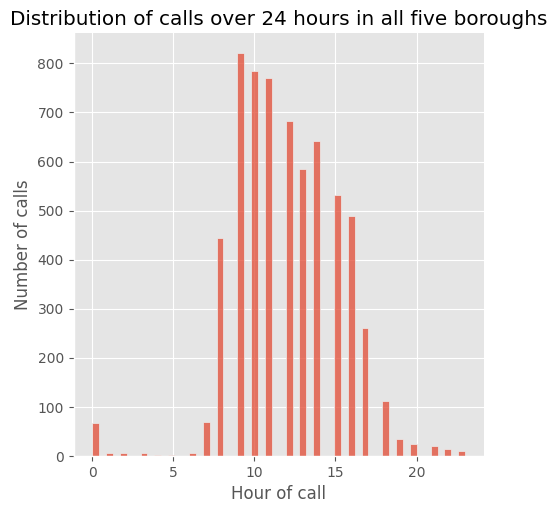

In [65]:
boroughs_distplot = sns.displot(df["Date and Time of initial call"].dt.hour )
plt.title("Distribution of calls over 24 hours in all five boroughs")
plt.xlabel("Hour of call")
plt.ylabel("Number of calls")
#plt.savefig("five_boroughs_calls_hours.png")
boroughs_distplot.savefig("five_boroughs_calls_hours.png")

### Manhattan 

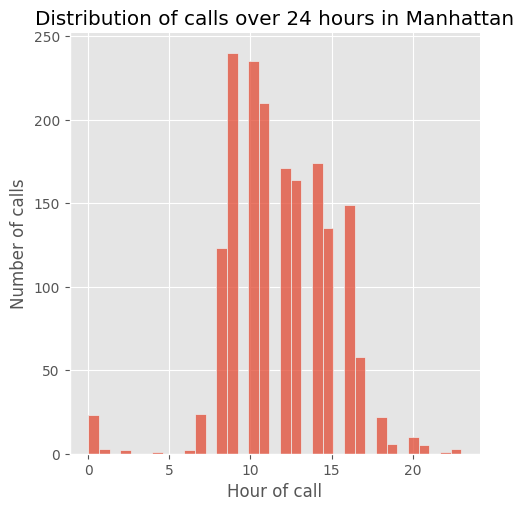

In [66]:
manhattan_hours = df.loc[df["Borough"] == "Manhattan","Date and Time of initial call"].dt.hour
sns.displot(manhattan_hours)
plt.title("Distribution of calls over 24 hours in Manhattan")
plt.xlabel("Hour of call")
plt.ylabel("Number of calls")
plt.savefig("manhattan_calls_hours.png")

### Brooklyn

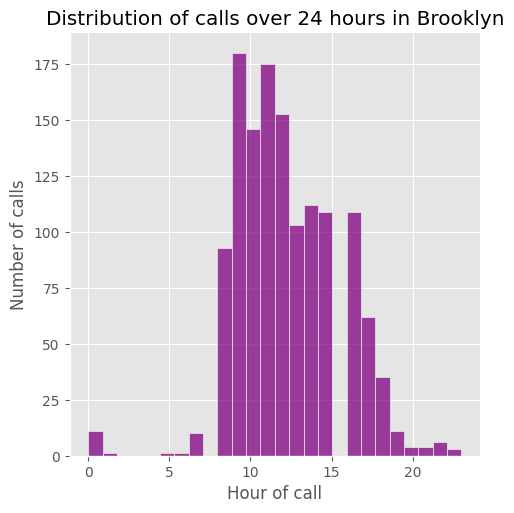

In [67]:
brooklyn_hours = df.loc[df["Borough"] == "Brooklyn","Date and Time of initial call"].dt.hour
sns.displot(brooklyn_hours, color='purple')
plt.title("Distribution of calls over 24 hours in Brooklyn")
plt.xlabel("Hour of call")
plt.ylabel("Number of calls")
plt.savefig("brooklyn_calls_hours.png")

## Queens 

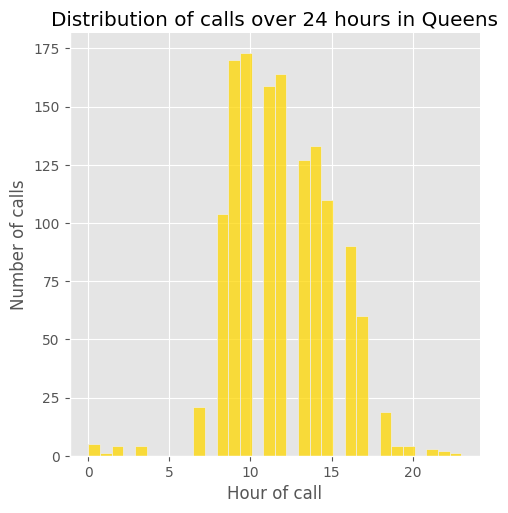

In [68]:
queens_hours = df.loc[df["Borough"] == "Queens" , "Date and Time of initial call"].dt.hour
sns.displot(queens_hours, color = 'gold') 
plt.title("Distribution of calls over 24 hours in Queens")
plt.xlabel("Hour of call")
plt.ylabel("Number of calls")
plt.savefig("queens_calls_hours.png")

## Bronx

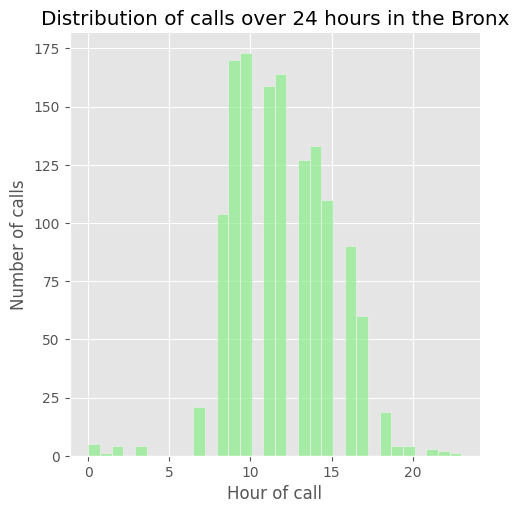

In [69]:
bronx_hours = df.loc[df["Borough"] == "Queens","Date and Time of initial call"].dt.hour
sns.displot(bronx_hours, color='lightgreen') 
plt.title("Distribution of calls over 24 hours in the Bronx")
plt.xlabel("Hour of call")
plt.ylabel("Number of calls")
plt.savefig("bronx_calls_hours.png")

## Staten Island 

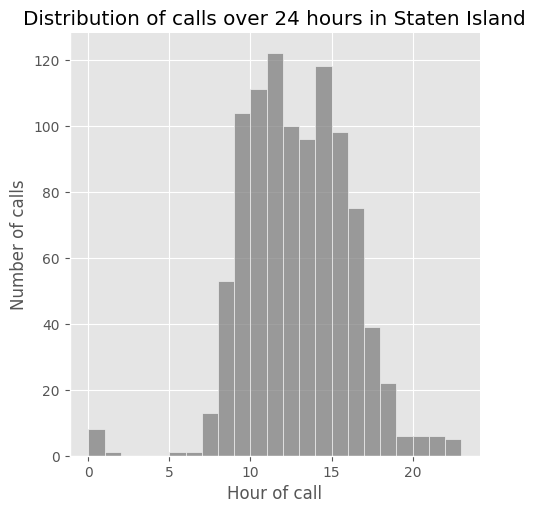

In [70]:
si_hours = df.loc[df["Borough"]=="Staten Island", "Date and Time of initial call"].dt.hour
sns.displot(si_hours, color='gray')
plt.title("Distribution of calls over 24 hours in Staten Island")
plt.xlabel("Hour of call")
plt.ylabel("Number of calls")
plt.savefig("statenisland_calls_hours.png")

## Distribution of calls over 24 hour period (per Borough)

In [71]:
#hours_dict = {'manhattan_hours':None , 'brooklyn_hours':None , 'queens_hours':None, 'bronx_hours':None, 'si_hours':None} 
hours_dict = dict() 
hrs_list = ['manhattan_hours', 'brooklyn_hours', 'queens_hours', 'bronx_hours', 'si_hours']

def get_borough(string): 
   return string.split("_")[0].title() #extracts borough name, puts in title casing

for x in hrs_list: 
    hours_dict[x] = df.loc[df["Borough"] == get_borough(x) ,"Date and Time of initial call"].dt.hour

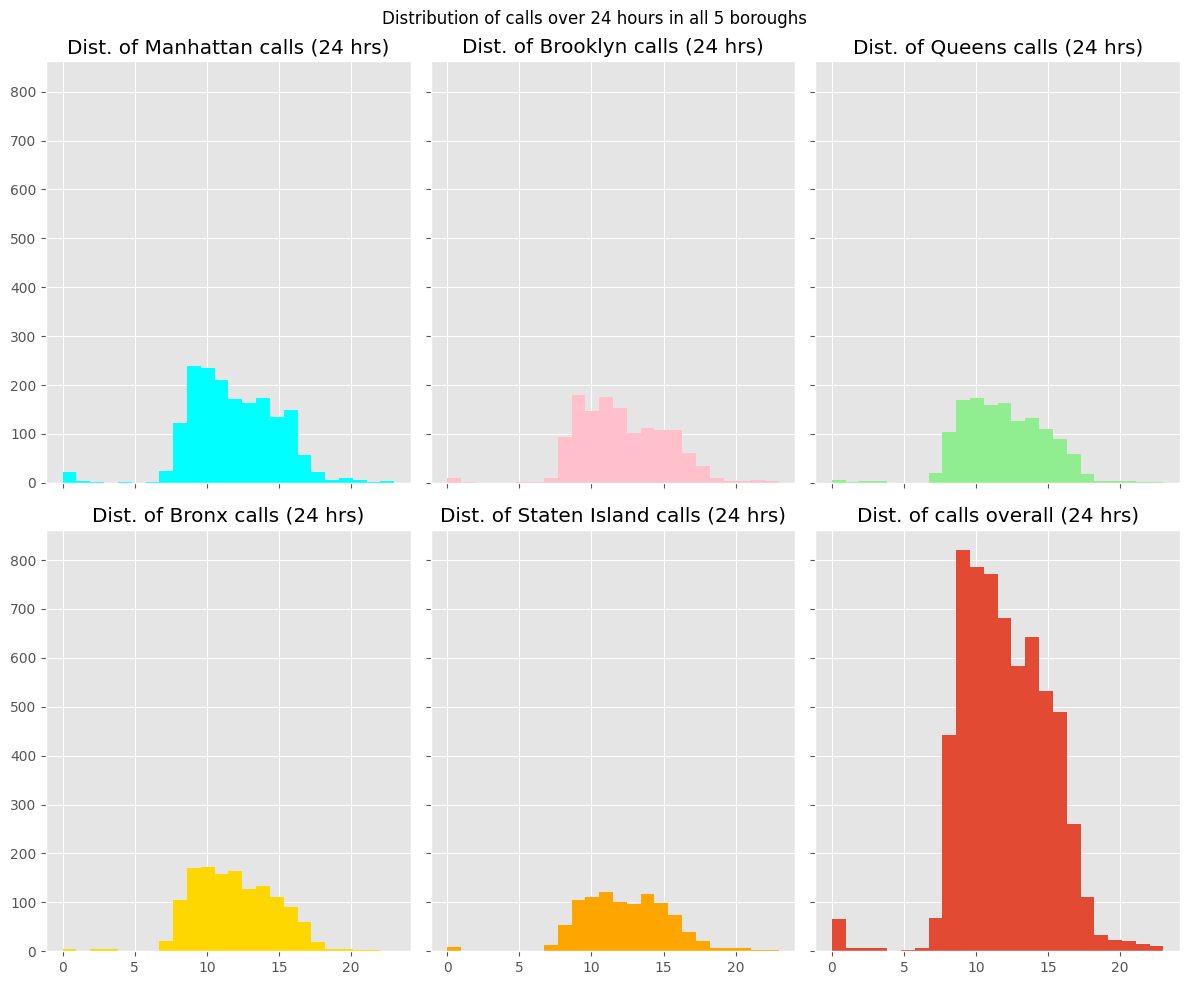

In [72]:
manhattan_hours = df.loc[df["Borough"] == "Manhattan","Date and Time of initial call"].dt.hour
brooklyn_hours = df.loc[df["Borough"] == "Brooklyn","Date and Time of initial call"].dt.hour
queens_hours = df.loc[df["Borough"] == "Queens" , "Date and Time of initial call"].dt.hour
bronx_hours = df.loc[df["Borough"] == "Queens","Date and Time of initial call"].dt.hour
si_hours = df.loc[df["Borough"]=="Staten Island", "Date and Time of initial call"].dt.hour

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2, 3, figsize=(12, 10), sharey=True , sharex=True)#ax5 will not be used

#axes = [ax1, ax2,ax3,ax4,ax6] 

#for x in fig.get_axes():


for x,y in zip(hrs_list,hours_dict): 
    hours_dict[x] = df.loc[df["Borough"] == get_borough(x) ,"Date and Time of initial call"].dt.hour
    
fig.suptitle("Distribution of calls over 24 hours in all 5 boroughs")

ax1.hist(manhattan_hours, bins = 24, color='cyan')
ax1.set_title("Dist. of Manhattan calls (24 hrs)") 

ax2.hist(brooklyn_hours, bins=24, color='pink')
ax2.set_title("Dist. of Brooklyn calls (24 hrs)")

ax3.hist(queens_hours, bins=24, color='lightgreen')
ax3.set_title("Dist. of Queens calls (24 hrs)")

ax4.hist(bronx_hours, bins=24, color='gold')
ax4.set_title("Dist. of Bronx calls (24 hrs)")

ax5.hist(si_hours,bins=24,color='orange')
ax5.set_title("Dist. of Staten Island calls (24 hrs)")

ax6.hist(df["Date and Time of initial call"].dt.hour,bins=24)
ax6.set_title("Dist. of calls overall (24 hrs)")

plt.tight_layout()
plt.show()
fig.savefig("dist_calls_5boroughs.png")

In [74]:
df["Animal Condition"].value_counts()

Animal Condition
Healthy      2039
Injured      1544
Unhealthy    1415
DOA           687
Name: count, dtype: int64

In [75]:
for x in boroughs: 
    print(f"For {x},  the breakdown for animal condition is the following \n {df.loc[df["Borough"] == x , "Animal Condition"].value_counts()} \n") 

For Brooklyn,  the breakdown for animal condition is the following 
 Animal Condition
Healthy      404
Injured      343
Unhealthy    332
DOA          112
Name: count, dtype: int64 

For Bronx,  the breakdown for animal condition is the following 
 Animal Condition
Healthy      349
Unhealthy    201
Injured      190
DOA          114
Name: count, dtype: int64 

For Staten Island,  the breakdown for animal condition is the following 
 Animal Condition
Healthy      308
Injured      284
Unhealthy    148
DOA          135
Name: count, dtype: int64 

For Queens,  the breakdown for animal condition is the following 
 Animal Condition
Healthy      465
Injured      378
Unhealthy    310
DOA          144
Name: count, dtype: int64 

For Manhattan,  the breakdown for animal condition is the following 
 Animal Condition
Healthy      513
Unhealthy    424
Injured      349
DOA          182
Name: count, dtype: int64 



## Visualizing Animal Status across the different boroughs

In [77]:
boroughs

['Brooklyn', 'Bronx', 'Staten Island', 'Queens', 'Manhattan']

In [78]:
conditions = df["Animal Condition"].dropna().unique().tolist()

conditions


df_condition = pd.DataFrame(index = boroughs, columns = conditions)
cond_borough_dict = dict() 

for x in boroughs : 
   cond_borough_dict[x] =  df.loc[df["Borough"] == x , "Animal Condition"].value_counts().values.tolist()


df_condition.head()

,Healthy,Injured,Unhealthy,DOA
Brooklyn,NaN,NaN,NaN,NaN
Bronx,NaN,NaN,NaN,NaN
Staten Island,NaN,NaN,NaN,NaN
Queens,NaN,NaN,NaN,NaN
Manhattan,NaN,NaN,NaN,NaN


In [79]:
cond_borough_dict

df_condition = pd.DataFrame.from_dict(cond_borough_dict, orient = "Index" , columns = conditions) 
df_condition

,Healthy,Injured,Unhealthy,DOA
Brooklyn,404,343,332,112
Bronx,349,201,190,114
Staten Island,308,284,148,135
Queens,465,378,310,144
Manhattan,513,424,349,182


## Animal Condition Heat Map (per borough)

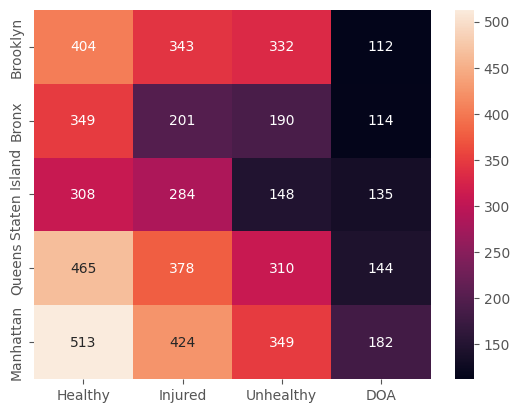

In [80]:
boroughs = df["Borough"].unique().tolist()
conditions = df["Animal Condition"].dropna().unique().tolist()

cond_borough_dict = dict() 

for x in boroughs : 
   cond_borough_dict[x] =  df.loc[df["Borough"] == x , "Animal Condition"].value_counts().values.tolist()


df_condition = pd.DataFrame.from_dict(cond_borough_dict, orient = "Index" , columns = conditions) 
df_condition

df_condition.head()

sns.heatmap(df_condition, annot = True , fmt = ".0f")
plt.savefig("animal_condition_heatmap.png")

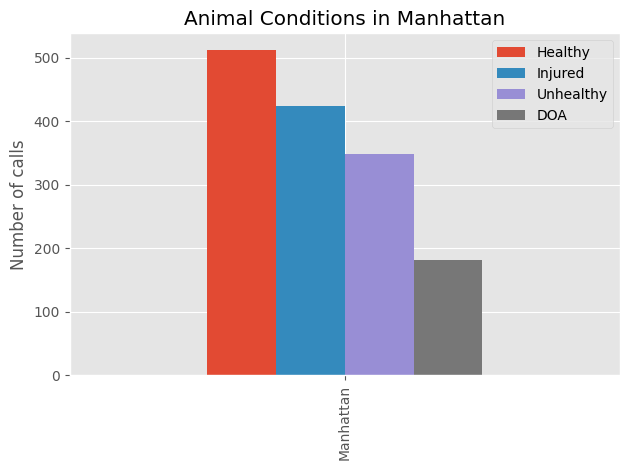

In [94]:
df_condition[df_condition.index=='Manhattan'].plot(kind='bar' , 
                                                   #color = ['lightgreen','purple','orange','salmon'],
                                                   title='Animal Conditions in Manhattan',
                                                   ylabel='Number of calls'
                                                    )
plt.tight_layout()
plt.savefig('manhattan_conditions_bar.png')
plt.show()

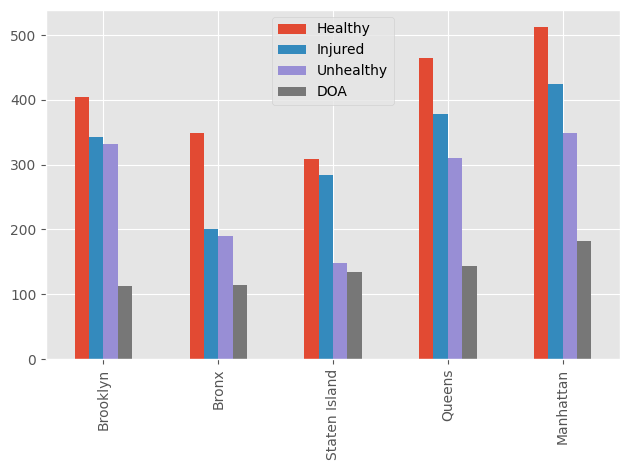

In [95]:
df_condition.plot(kind='bar')
plt.legend(loc='upper center')
plt.tight_layout()
plt.savefig("barchart_animal_condition.png")
plt.show()

## Ranger Final Action distribution 

<Axes: xlabel='Final Ranger Action'>

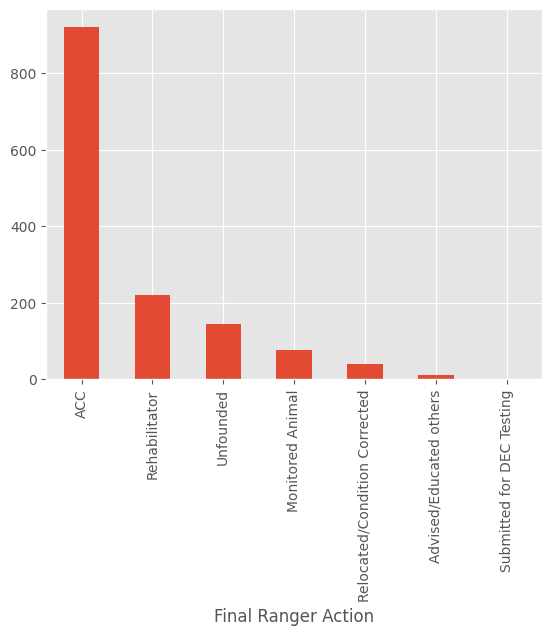

In [30]:
df.loc[df["Animal Condition"] == "Unhealthy","Final Ranger Action"].value_counts().plot(kind='bar')

In [39]:
conditions = df["Animal Condition"].dropna().unique().tolist()
conditions

['Healthy', 'Injured', 'Unhealthy', 'DOA']

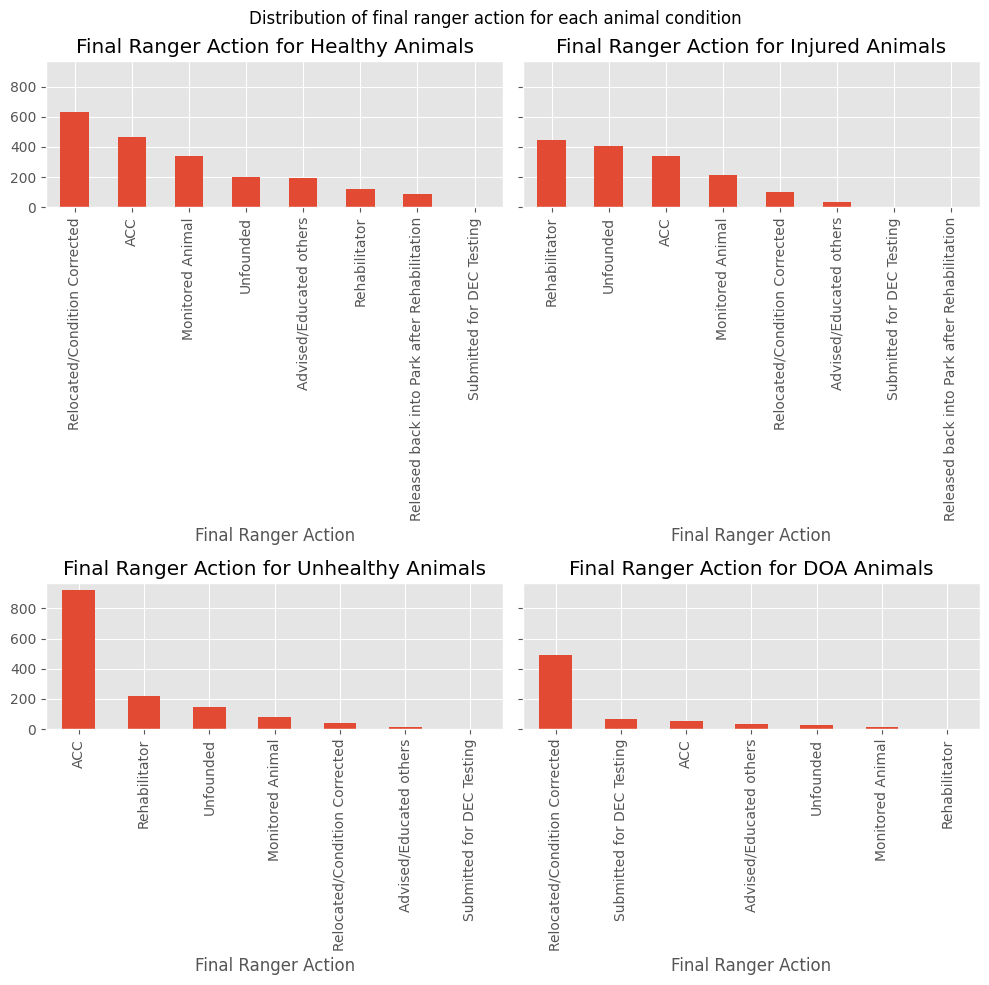

In [52]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(10, 10), sharey=True)

#axes_list = [ax1,ax2,ax3,ax4]

#ax1 - Healthy
df.loc[df["Animal Condition"] == "Healthy","Final Ranger Action"].value_counts().plot(kind='bar',
                                                                                           ax = ax1)
ax1.set_title("Final Ranger Action for Healthy Animals")

#ax2 - Injured
df.loc[df["Animal Condition"] == "Injured","Final Ranger Action"].value_counts().plot(kind='bar',
                                                                                           ax = ax2)
ax2.set_title("Final Ranger Action for Injured Animals")

#ax 3 - Unhealthy
df.loc[df["Animal Condition"] == "Unhealthy","Final Ranger Action"].value_counts().plot(kind='bar',
                                                                                           ax = ax3)
ax3.set_title("Final Ranger Action for Unhealthy Animals")

#ax4 - DOA 
df.loc[df["Animal Condition"] == "DOA","Final Ranger Action"].value_counts().plot(kind='bar',
                                                                                           ax = ax4)
ax4.set_title("Final Ranger Action for DOA Animals")

fig.suptitle("Distribution of final ranger action for each animal condition")
plt.tight_layout()
plt.show()
fig.savefig("condition_bars.png")

<Axes: xlabel='Final Ranger Action'>

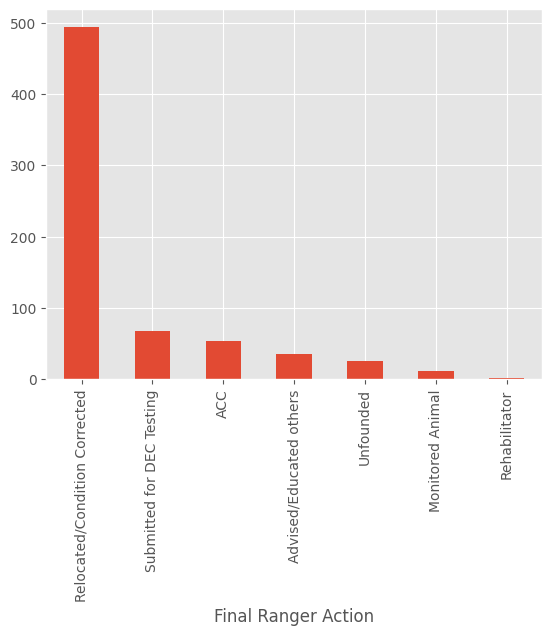

In [45]:
df.loc[df["Animal Condition"] == "DOA","Final Ranger Action"].value_counts().plot(kind='bar')

## Species in incidences throughout the year

### Manhattan

In [97]:
species_manhattan= df.loc[df["Borough"] == "Manhattan" , "Species Description"].dropna().unique().tolist()
species_manhattan

['Dog',
 'Eastern Gray Squirrel',
 'Raccoon',
 'Common Snapping Turtle',
 'American Kestrel',
 'Domestic Duck',
 'Chicken',
 'Mallard Duck',
 'Red-Eared Slider',
 'Red-eared Slider',
 'Snake (Unknown)',
 'Red-tailed Hawk',
 'House Sparrow',
 'American Robin',
 'Rock Dove',
 'Canada Goose',
 'Turtle (Unknown)',
 'Blue Jay',
 'Muskrat',
 'Virginia Opossum',
 'Rose-breasted Grosbeak',
 'Eastern Cottontail Rabbit',
 'Eastern Coyote',
 'Red-Bellied Woodpecker',
 'Domestic Rabbit',
 'Cat',
 'Double-crested Cormorant',
 'Northern Flicker',
 'Great Egret',
 'Animal (Unknown)',
 'Hamster',
 'Domestic Dove',
 'Wood Duck',
 'Carolina Wren',
 'Norway Rat',
 'Black-backed gull',
 'Brant Goose',
 'Groundhog',
 'Northern Cardinal',
 'Double-Crested Cormorant',
 'Bird (Unknown)',
 'Parakeet (Unknown)',
 'Barred Owl',
 'Black-Crowned Night Heron',
 "Cooper's Hawk",
 'Yellow-Rumped Warbler',
 'Merlin',
 'Caiman (Unknown)',
 'Eastern Yellowjacket',
 'Green Warbler',
 'Herring Gull',
 'Mourning Dove',
 'R

In [98]:
species_manhattan= df.loc[df["Borough"] == "Manhattan" , "Species Description"].dropna().unique().tolist()
species_manhattan
species_manhattan_dict = dict() 

for x in species_manhattan: 
    species_manhattan_dict[x] = len(df.loc[(df["Borough"] == "Manhattan") & (df["Species Description"] == x)])

species_manhattan_dict

{'Dog': 48,
 'Eastern Gray Squirrel': 92,
 'Raccoon': 552,
 'Common Snapping Turtle': 12,
 'American Kestrel': 8,
 'Domestic Duck': 16,
 'Chicken': 36,
 'Mallard Duck': 64,
 'Red-Eared Slider': 31,
 'Red-eared Slider': 11,
 'Snake (Unknown)': 4,
 'Red-tailed Hawk': 133,
 'House Sparrow': 14,
 'American Robin': 27,
 'Rock Dove': 33,
 'Canada Goose': 127,
 'Turtle (Unknown)': 5,
 'Blue Jay': 10,
 'Muskrat': 3,
 'Virginia Opossum': 24,
 'Rose-breasted Grosbeak': 1,
 'Eastern Cottontail Rabbit': 1,
 'Eastern Coyote': 11,
 'Red-Bellied Woodpecker': 1,
 'Domestic Rabbit': 9,
 'Cat': 32,
 'Double-crested Cormorant': 17,
 'Northern Flicker': 2,
 'Great Egret': 3,
 'Animal (Unknown)': 2,
 'Hamster': 1,
 'Domestic Dove': 4,
 'Wood Duck': 4,
 'Carolina Wren': 3,
 'Norway Rat': 4,
 'Black-backed gull': 1,
 'Brant Goose': 1,
 'Groundhog': 14,
 'Northern Cardinal': 2,
 'Double-Crested Cormorant': 12,
 'Bird (Unknown)': 8,
 'Parakeet (Unknown)': 1,
 'Barred Owl': 1,
 'Black-Crowned Night Heron': 2,
 

In [100]:
boroughs = df["Borough"].unique().tolist()

boroughs

['Brooklyn', 'Bronx', 'Staten Island', 'Queens', 'Manhattan']

In [103]:
df_manhattan = df[df["Borough"] == "Manhattan"] 
top10_manhattan_species = df_manhattan["Species Description"].value_counts().nlargest(10)
top10_manhattan_species


months = list(calendar.month_name)[1:]

months

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [104]:
top10_manhattan_species = list(df_manhattan["Species Description"].value_counts().nlargest(11).index.unique())
top10_manhattan_species
top10_manhattan_species_qtys = list(df_manhattan["Species Description"].value_counts().nlargest(10).index)

months = list(calendar.month_name)[1:]

df_man_species_months = pd.DataFrame(df_manhattan, columns=months, index=top10_manhattan_species)
man_species_time_dict = dict()

df_man_species_months

,January,February,March,April,May,June,July,August,September,October,November,December
Raccoon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Red-tailed Hawk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Canada Goose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Eastern Gray Squirrel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mallard Duck,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Striped Skunk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rock Dove,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
raccoon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(plt.style.available)
plt.style.use('fivethirtyeight')

In [ ]:
df_man_species_months.transpose()

### df_manhattan --> Season stacked area chart

In [10]:
def get_season(date_dt): 
    date_str = str(date_dt)[:10]
    date_no_time = dt.datetime.strptime(date_str,"%Y-%m-%d")
    month = date_no_time.month

    
    if month in [12,1,2] : 
        return "Winter" 
    elif month in [3,4,5]: 
        return "Spring"
    elif month in [6,7,8]:
        return "Summer"
    elif month in [9,10,11]: 
        return "Autumn"

test_date = df["Date and Time of initial call"][1]

test_season = get_season(test_date)
test_season

'Summer'

In [11]:
df_manhattan_seasons = df[df["Borough"] == "Manhattan"].copy()
df_manhattan_seasons["Season"] = df_manhattan_seasons["Date and Time of initial call"].apply(get_season)

df_manhattan_seasons.head()

,Date and Time of initial call,Date and time of Ranger response,Borough,Property,Location,Species Description,Call Source,Species Status,Animal Condition,Duration of Response,...,Final Ranger Action,# of Animals,PEP Response,Animal Monitored,Rehabilitator,Hours spent monitoring,Police Response,ESU Response,ACC Intake Number,Season
9,2021-06-22 11:30:00,2021-06-22 11:30:00,Manhattan,Highbridge Park,Coogan's Bluff Playground,Dog,Central,Domestic,NaN,0.75,...,Unfounded,0.0,False,False,NaN,NaN,False,False,NaN,Summer
11,2021-06-22 12:00:00,2021-06-22 12:00:00,Manhattan,Inwood Hill Park,214th and Seaman Ave,Eastern Gray Squirrel,Employee,Native,Injured,0.50,...,Advised/Educated others,1.0,False,True,NaN,0.5,False,False,NaN,Summer
16,2021-06-21 09:20:00,2021-06-21 12:00:00,Manhattan,Central Park,West 97 St entrance,Raccoon,Central,Native,Injured,0.50,...,Unfounded,0.0,False,False,NaN,NaN,False,False,NaN,Summer
19,2021-06-20 09:00:00,2021-06-20 15:00:00,Manhattan,Inwood Hill Park,Northwest edge of Gaelic Field,Common Snapping Turtle,Employee,Native,NaN,1.00,...,Unfounded,0.0,False,False,NaN,NaN,False,False,NaN,Summer
20,2021-06-19 09:00:00,2021-06-19 10:00:00,Manhattan,Inwood Hill Park,Payson Visitor Center,Common Snapping Turtle,Employee,Native,Healthy,0.50,...,Relocated/Condition Corrected,1.0,False,True,NaN,0.5,False,False,NaN,Summer


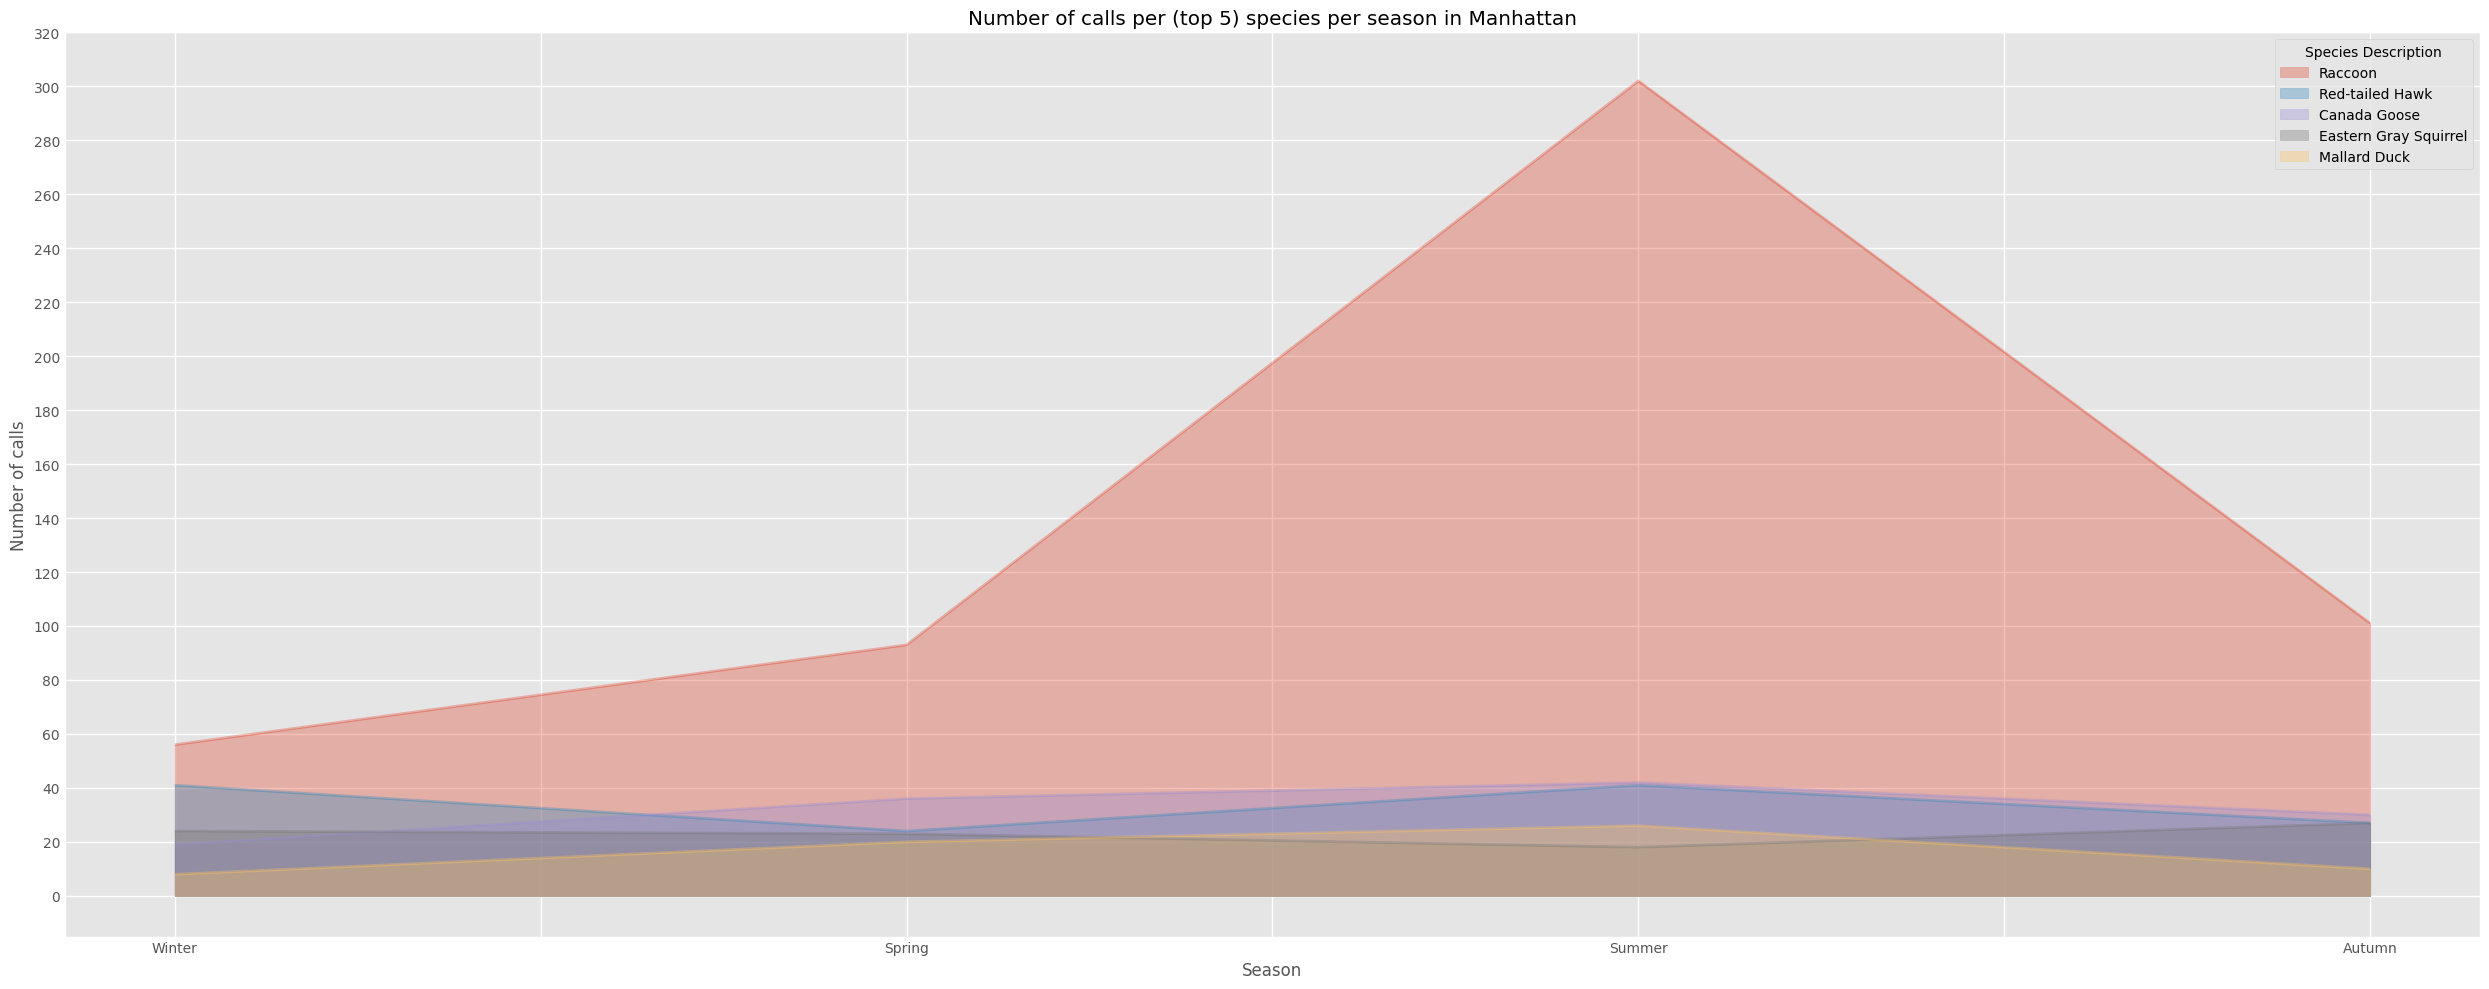

In [137]:
max_val = int(df_man_species_seasons.max().nlargest(1).values[0])
area_yticks = range(0,max_val + 20 ,20)
seasons = ['Winter','Spring','Summer','Autumn']

df_man_species_seasons_t = df_man_species_seasons.transpose()

df_man_species_seasons_t.plot.area(
                       stacked=False, 
                       yticks=area_yticks,
                       figsize = (25,10),
                       alpha=0.35 ,
                       xlabel='Season', 
                       ylabel='Number of calls',
                       title='Number of calls per (top 5) species per season in Manhattan'
)
plt.tight_layout()
plt.savefig('number_of_calls_per_top5_species_manhattan_year_seasons.png')
plt.show()

## Season breakdown for Brooklyn

In [124]:
#create intermediate dataframe 
df_brooklyn_seasons = df[df["Borough"] == "Brooklyn"].copy()
df_brooklyn_seasons["Season"] = df_brooklyn_seasons["Date and Time of initial call"].apply(get_season)


top5_brooklyn_species = df_brooklyn_seasons["Species Description"].value_counts().nlargest(5).index
df_bk_species_seasons = pd.DataFrame(df_brooklyn_seasons, columns=seasons, index=top5_brooklyn_species)


for x in top5_brooklyn_species: 
    for y in seasons: 
        df_bk_species_seasons.loc[x, y] = int(len(df_brooklyn_seasons.loc[(df_brooklyn_seasons["Species Description"] == x) & (df_brooklyn_seasons["Season"] == y)]))

df_bk_species_seasons

,Winter,Spring,Summer,Autumn
Species Description,,,,
Raccoon,39.0,65.0,56.0,156.0
Eastern Gray Squirrel,19.0,16.0,27.0,26.0
Dog,25.0,19.0,21.0,17.0
Mute Swan,28.0,11.0,13.0,20.0
Cat,13.0,18.0,17.0,16.0


### Creating the Brooklyn Seasons Area Plot for the Top 5 Speicies in Brooklyn 


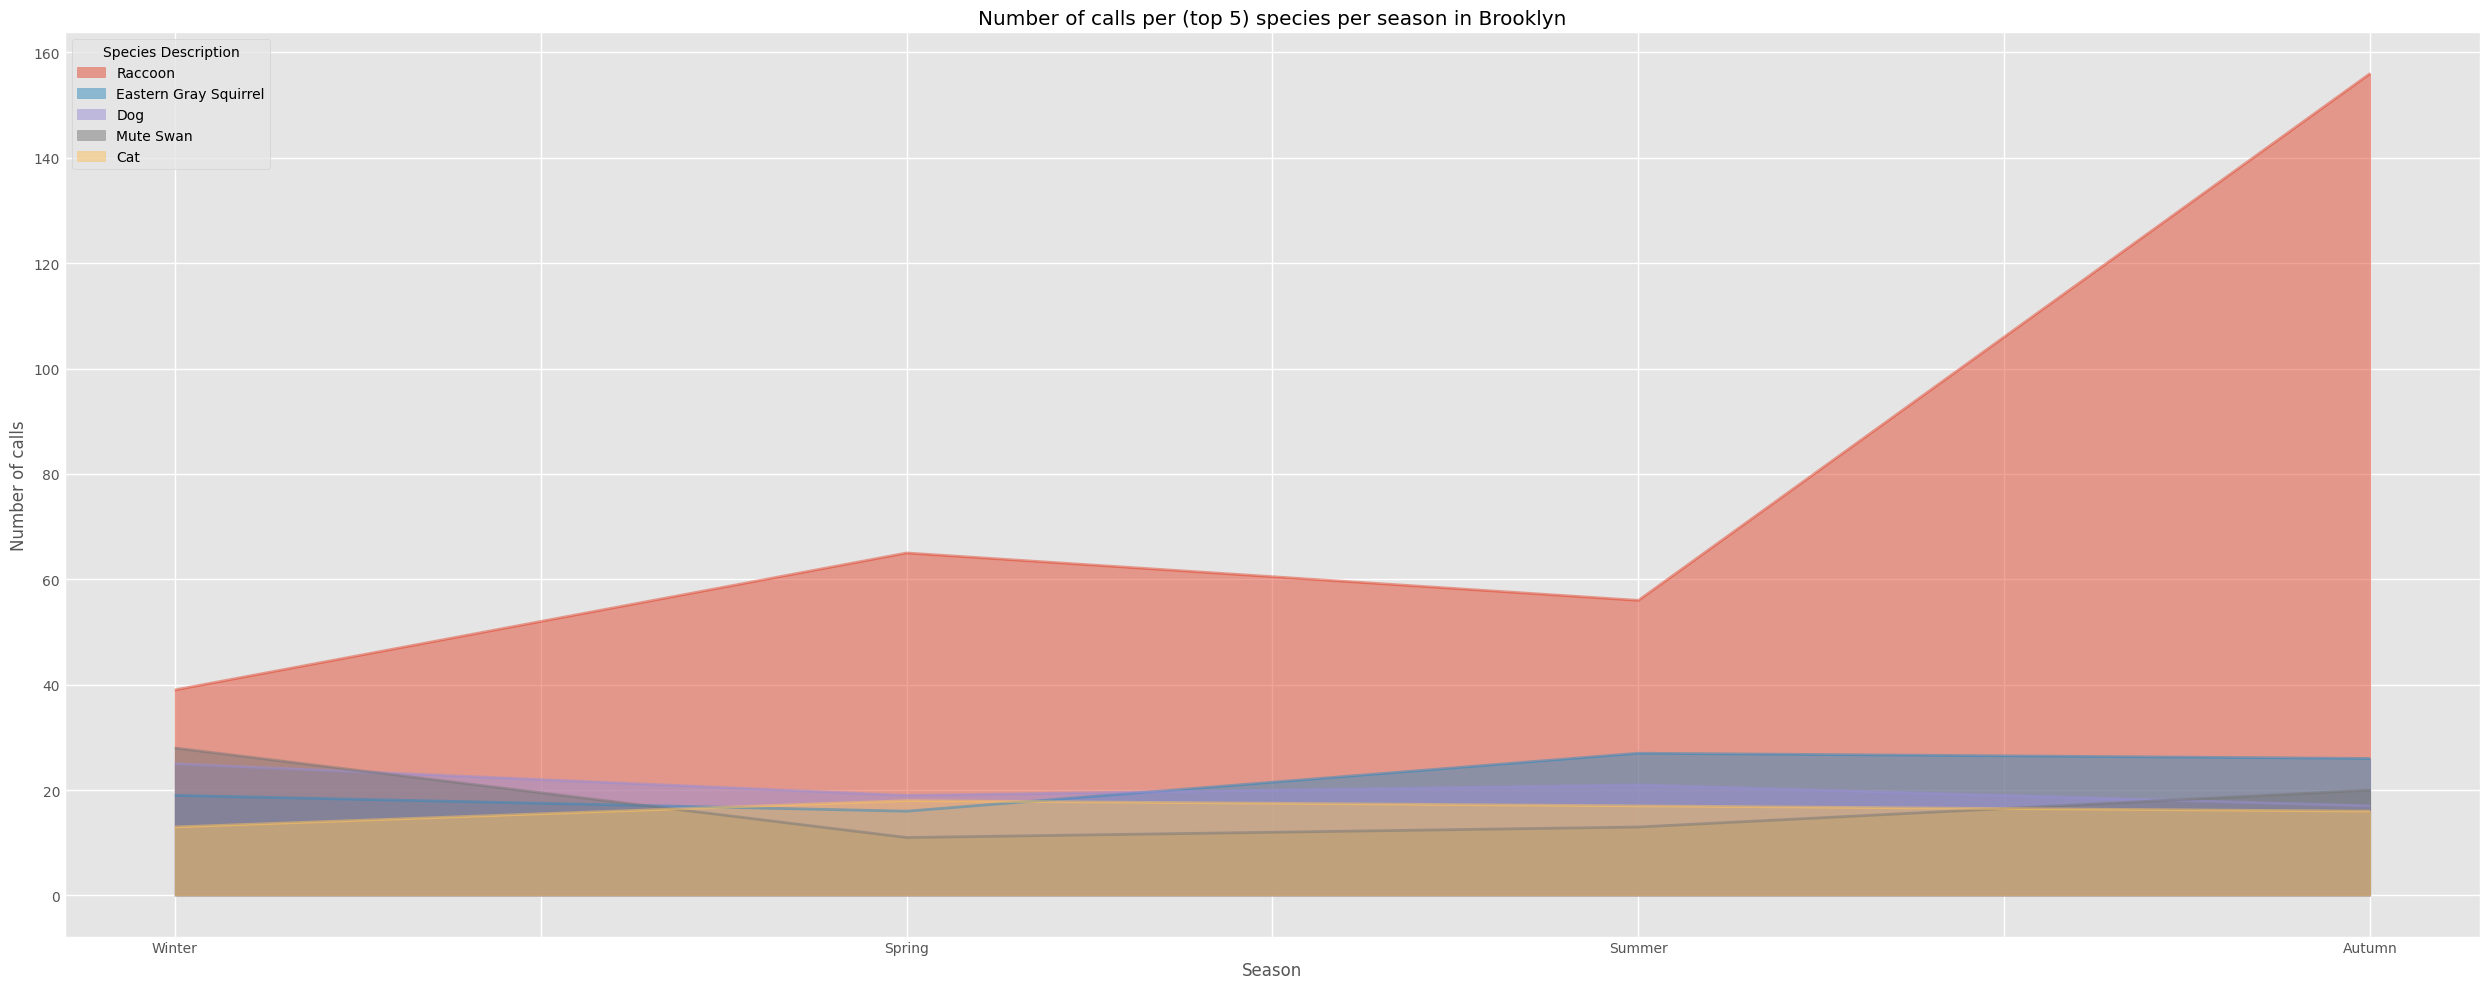

In [139]:
max_val = int(df_bk_species_seasons.max().nlargest(1).values[0])
area_yticks = range(0,max_val + 20 ,20)
seasons = ['Winter','Spring','Summer','Autumn']

df_bk_species_seasons_t = df_bk_species_seasons.transpose()

df_bk_species_seasons_t.plot.area(
                       stacked=False, 
                       yticks=area_yticks,
                       figsize = (25,10),
                       xlabel='Season', 
                       ylabel='Number of calls',
                       title='Number of calls per (top 5) species per season in Brooklyn'
)
plt.tight_layout()
plt.savefig('number_of_calls_per_top5_species_brooklyn_year_seasons.png')
plt.show()

In [107]:
max_val = int(df_bk_species_seasons.max().nlargest(1).values[0])
max_val

156

## Seasons vs Top 5 Species : Queens ,  Bronx , Staten Island 


### Queens 

In [140]:
#create intermediate dataframe 
df_queens_seasons = df[df["Borough"] == "Queens"].copy()
df_queens_seasons["Season"] = df_queens_seasons["Date and Time of initial call"].apply(get_season)


top5_queens_species = df_queens_seasons["Species Description"].value_counts().nlargest(5).index
df_qns_species_seasons = pd.DataFrame(df_queens_seasons, columns=seasons, index=top5_queens_species)


for x in top5_queens_species: 
    for y in seasons: 
        df_qns_species_seasons.loc[x, y] = int(len(df_queens_seasons.loc[(df_queens_seasons["Species Description"] == x) & (df_queens_seasons["Season"] == y)]))

df_qns_species_seasons

,Winter,Spring,Summer,Autumn
Species Description,,,,
Raccoon,68.0,137.0,81.0,87.0
Dog,22.0,21.0,34.0,27.0
Canada Goose,26.0,20.0,13.0,12.0
Cat,6.0,22.0,22.0,9.0
Eastern Gray Squirrel,9.0,18.0,15.0,13.0


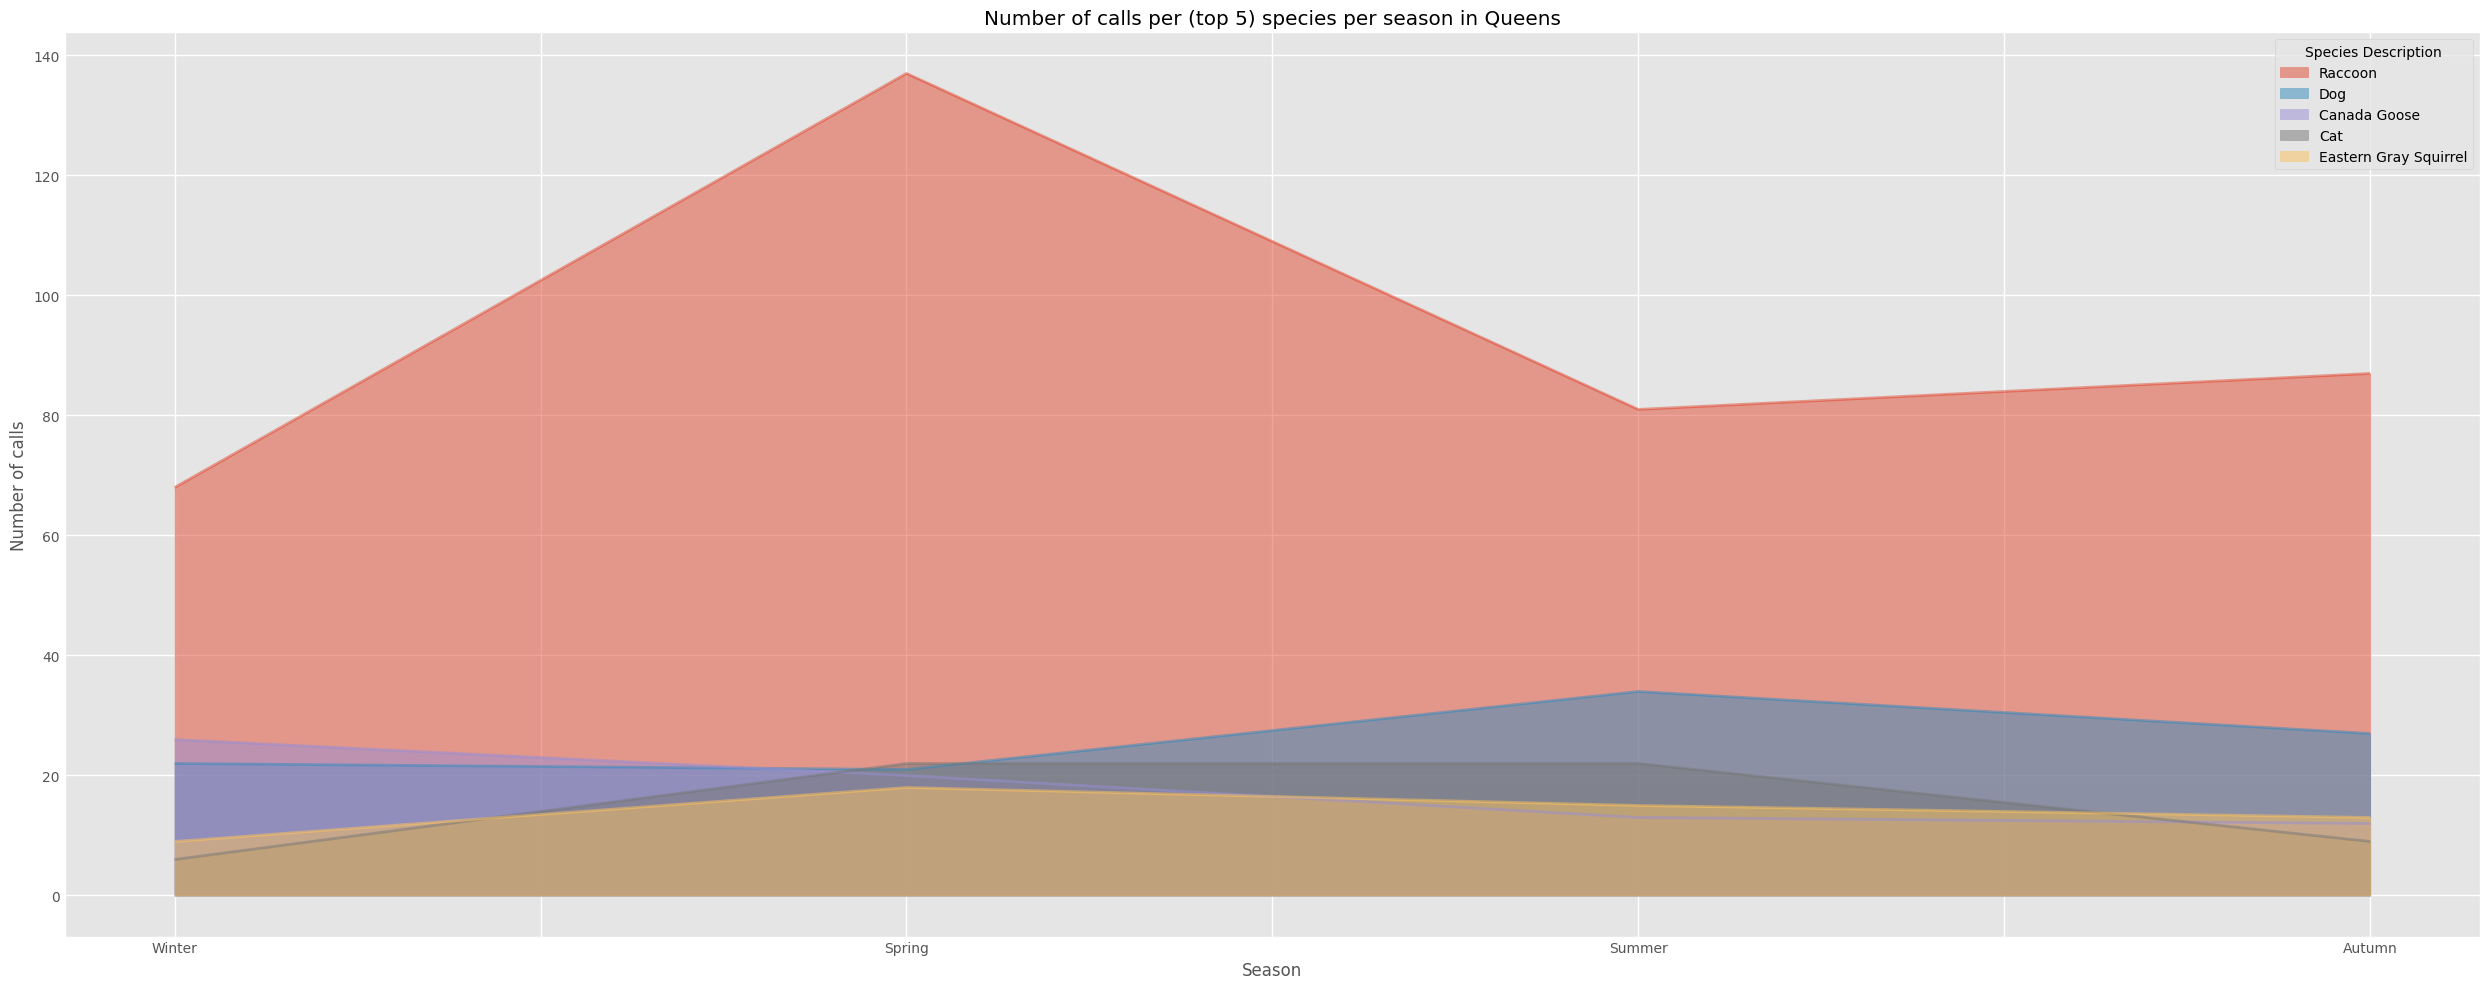

In [144]:
max_val = int(df_qns_species_seasons.max().nlargest(1).values[0])
area_yticks = range(0,max_val + 20 ,20)
seasons = ['Winter','Spring','Summer','Autumn']

df_qns_species_seasons_t = df_qns_species_seasons.transpose()

df_qns_species_seasons_t.plot.area(
                       stacked=False, 
                       yticks=area_yticks,
                       figsize = (25,10),
                       xlabel='Season', 
                       ylabel='Number of calls',
                       title='Number of calls per (top 5) species per season in Queens'
)
plt.tight_layout()
plt.savefig('number_of_calls_per_top5_species_queens_year_seasons.png')
plt.show()

### Bronx

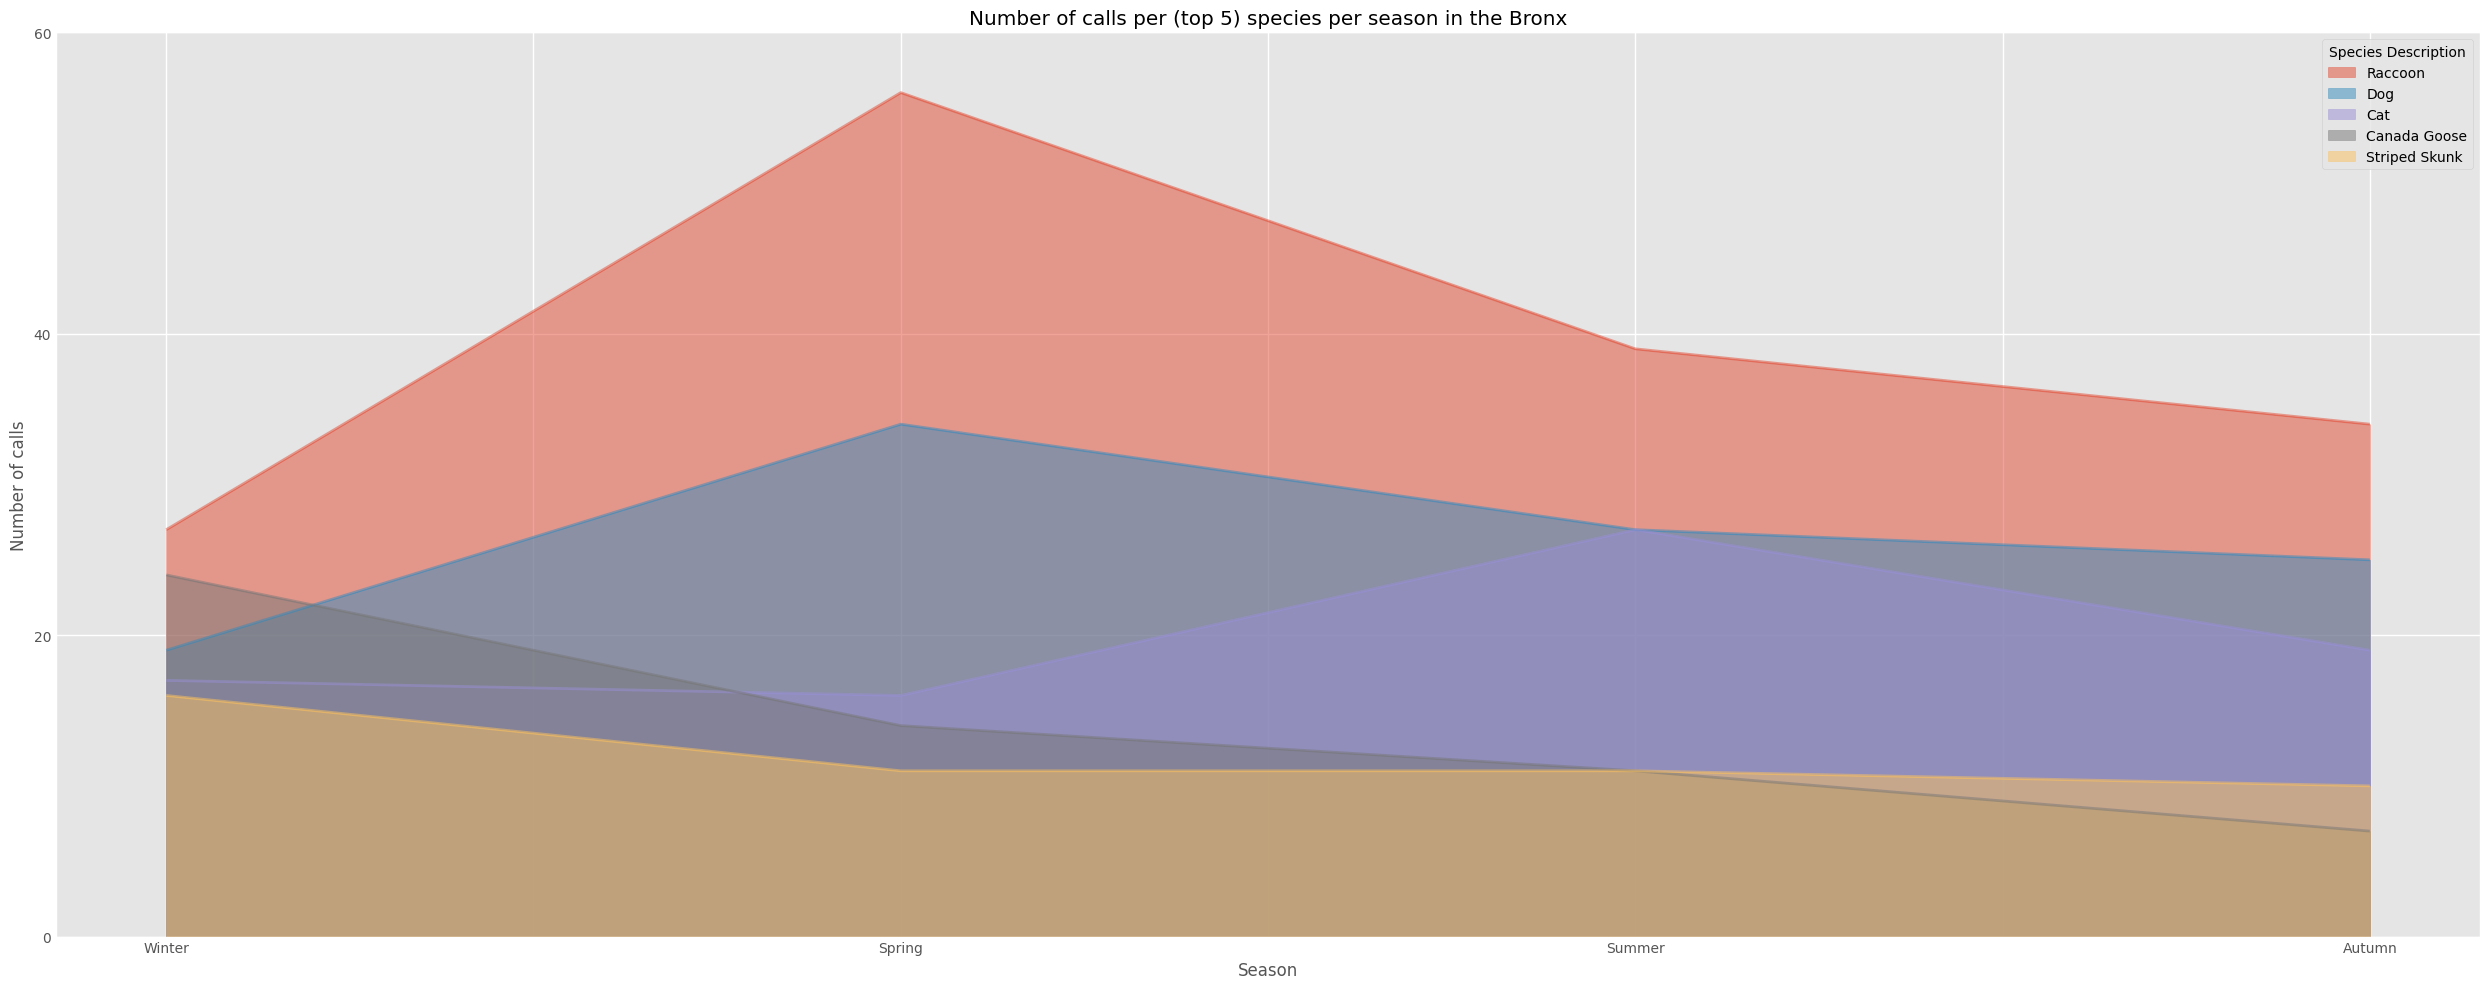

In [147]:
#create intermediate dataframe  
df_bronx_seasons = df[df["Borough"] == "Bronx"] .copy()
df_bronx_seasons["Season"] = df_bronx_seasons["Date and Time of initial call"].apply(get_season)


top5_bronx_species = df_bronx_seasons["Species Description"].value_counts().nlargest(5).index
df_bx_species_seasons = pd.DataFrame(df_bronx_seasons, columns=seasons, index=top5_bronx_species)


for x in top5_bronx_species: 
    for y in seasons: 
        df_bx_species_seasons.loc[x, y] = int(len(df_bronx_seasons.loc[(df_bronx_seasons["Species Description"] == x) & (df_bronx_seasons["Season"] == y)]))

df_bx_species_seasons


# Create the area chart for the Bronx 
max_val = int(df_bx_species_seasons.max().nlargest(1).values[0])
area_yticks = range(0,max_val + 20 ,20)
seasons = ['Winter','Spring','Summer','Autumn']

df_bx_species_seasons_t = df_bx_species_seasons.transpose()

df_bx_species_seasons_t.plot.area(
                       stacked=False, 
                       yticks=area_yticks,
                       figsize = (25,10),
                       xlabel='Season', 
                       ylabel='Number of calls',
                       title='Number of calls per (top 5) species per season in the Bronx'
)
plt.tight_layout()
plt.savefig('number_of_calls_per_top5_species_bronx_year_seasons.png')
plt.show()

In [148]:
df_bx_species_seasons

,Winter,Spring,Summer,Autumn
Species Description,,,,
Raccoon,27.0,56.0,39.0,34.0
Dog,19.0,34.0,27.0,25.0
Cat,17.0,16.0,27.0,19.0
Canada Goose,24.0,14.0,11.0,7.0
Striped Skunk,16.0,11.0,11.0,10.0


### Staten Island


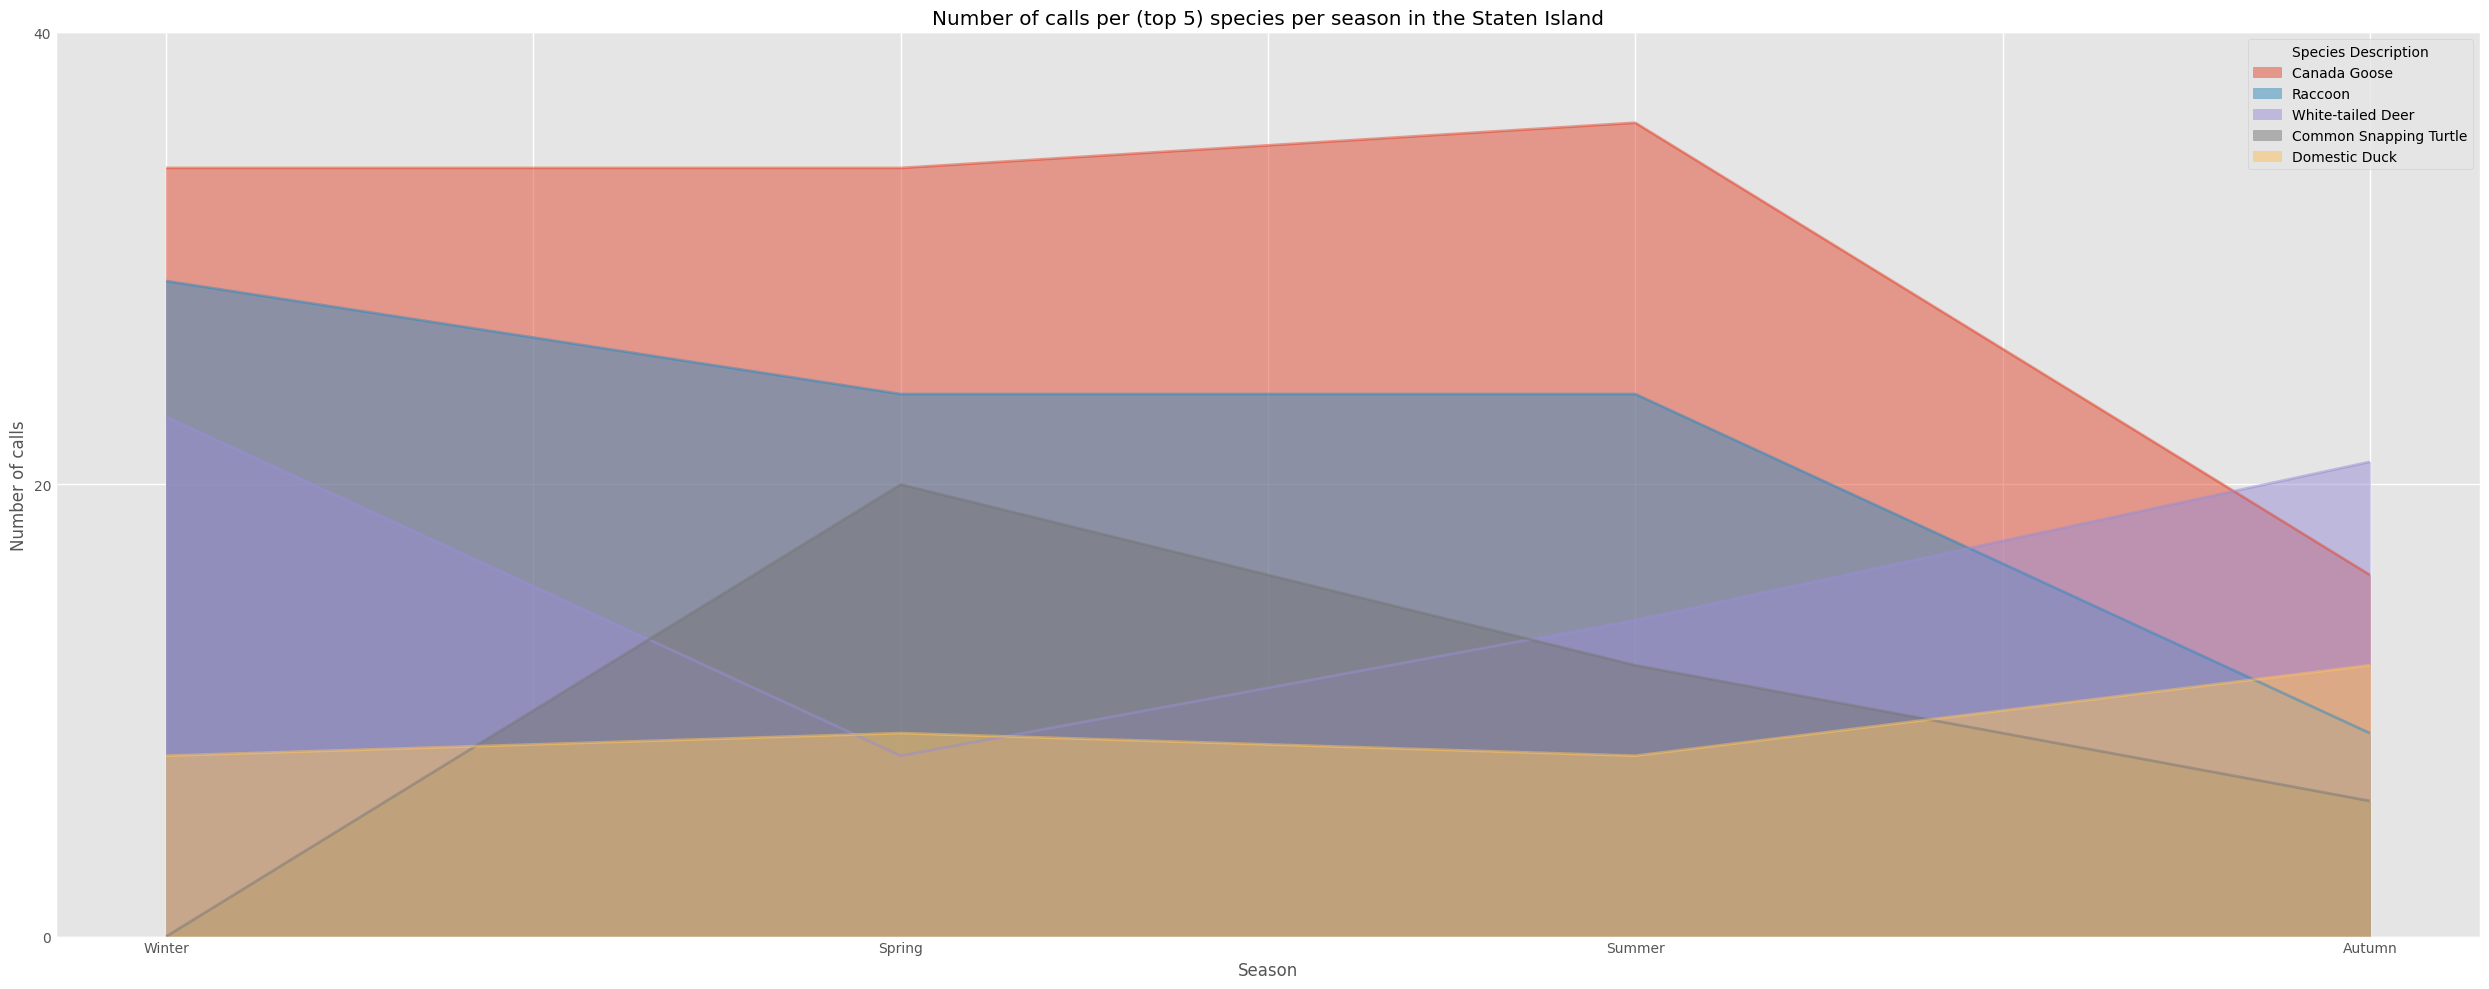

In [146]:
#create intermediate dataframe 
df_staten_island = df[df["Borough"] == "Staten Island"] 
df_staten_island_seasons = df_staten_island.copy()
df_staten_island_seasons["Season"] = df_staten_island_seasons["Date and Time of initial call"].apply(get_season)


top5_staten_island_species = df_staten_island_seasons["Species Description"].value_counts().nlargest(5).index
df_si_species_seasons = pd.DataFrame(df_staten_island_seasons, columns=seasons, index=top5_staten_island_species)


for x in top5_staten_island_species: 
    for y in seasons: 
        df_si_species_seasons.loc[x, y] = int(len(df_staten_island_seasons.loc[(df_staten_island_seasons["Species Description"] == x) & (df_staten_island_seasons["Season"] == y)]))

df_si_species_seasons


# Create the area chart for the Staten Island 
max_val = int(df_si_species_seasons.max().nlargest(1).values[0])
area_yticks = range(0,max_val + 20 ,20)
seasons = ['Winter','Spring','Summer','Autumn']

df_si_species_seasons_t = df_si_species_seasons.transpose()

df_si_species_seasons_t.plot.area(
                       stacked=False, 
                       yticks=area_yticks,
                       figsize = (25,10),
                       xlabel='Season', 
                       ylabel='Number of calls',
                       title='Number of calls per (top 5) species per season in the Staten Island'
)

plt.tight_layout()
plt.savefig('number_of_calls_per_top5_species_si_year_seasons.png')
plt.show()

In [149]:
df_si_species_seasons

,Winter,Spring,Summer,Autumn
Species Description,,,,
Canada Goose,34.0,34.0,36.0,16.0
Raccoon,29.0,24.0,24.0,9.0
White-tailed Deer,23.0,8.0,14.0,21.0
Common Snapping Turtle,0.0,20.0,12.0,6.0
Domestic Duck,8.0,9.0,8.0,12.0


## Police or ESU response ? 

In [94]:
df["ESU Response"].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6385 entries, 0 to 6384
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date and Time of initial call     6385 non-null   datetime64[ns]
 1   Date and time of Ranger response  6385 non-null   datetime64[ns]
 2   Borough                           6385 non-null   object        
 3   Property                          6384 non-null   object        
 4   Location                          6343 non-null   object        
 5   Species Description               6382 non-null   object        
 6   Call Source                       6385 non-null   object        
 7   Species Status                    6324 non-null   object        
 8   Animal Condition                  5685 non-null   object        
 9   Duration of Response              6385 non-null   float64       
 10  Age                               6385 non-null 

What are some things that probably indicate that the animals in the call are likely going to be okay ? 
* ESU/Police Response == False
* Animal Condition == Healthy
* ACC Intake Number == null  (ACC stands for animal care center)
* Animal Monitored == False
* or
* Hours spent monitoring == "low number"
* Species Status == Invasive or Exotic (probably a bigger threat to environment. probably not in trouble)

In [95]:
df["PEP Response"].value_counts()

PEP Response
False    6112
True      273
Name: count, dtype: int64

<Axes: xlabel='PEP Response'>

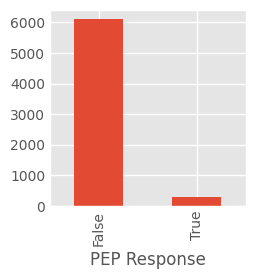

In [151]:
df["PEP Response"].value_counts().plot(kind='bar')

## Agency Callout 

### Test run

In [19]:
df_res = df[['Species Description','ESU Response','Police Response']]
df_res = df_res.set_index('Species Description')
df_res

,ESU Response,Police Response
Species Description,,
Chukar,False,False
Sparrow,False,False
White-tailed Deer,False,False
Raccoon,False,False
Virginia Opossum,False,False
...,...,...
Rock Dove,False,False
House Sparrow,False,False
American Robin,False,False


In [26]:
species_res = df_res.index.unique().tolist()
species_res
species_dict= dict()

for x in species_res: 
    df_tmp = (df_res[df_res.index == x])
    species_dict[x] = len(df_tmp[df_tmp['ESU Response'] == True])
species_dict

{'Chukar': 0,
 'Sparrow': 0,
 'White-tailed Deer': 19,
 'Raccoon': 2,
 'Virginia Opossum': 1,
 'Domestic Duck': 0,
 'Canada Goose': 0,
 'Cat': 0,
 'Dog': 5,
 'Eastern Rat Snake': 0,
 'Eastern Gray Squirrel': 0,
 'Domestic Rabbit': 0,
 'Northern Cardinal': 0,
 'Mallard Duck': 1,
 'Double-crested Cormorant': 0,
 'Common Snapping Turtle': 0,
 'Chicken': 0,
 'Argentine Black and White Tegu': 0,
 'American Kestrel': 0,
 'Red-tailed Hawk': 2,
 'Rock Dove': 0,
 'Catfish': 0,
 'Red-Eared Slider': 0,
 'Bat (Unknown)': 0,
 'Common Grackle': 0,
 'Herring Gull': 0,
 'Laughing Gull': 0,
 'Diamondback Terrapin': 0,
 'Red-eared Slider': 0,
 'Raptor (Unknown)': 0,
 'Blue Jay': 0,
 'Barn Swallow': 0,
 'Bird (Unknown)': 0,
 'Mute Swan': 0,
 'Wood Duck': 0,
 'Turtle (Unknown)': 0,
 'Spiny Softshell Turtle': 0,
 'Warbling Vireo': 0,
 'Snake (Unknown)': 0,
 'Brant Goose': 0,
 'House Sparrow': 0,
 'American Robin': 0,
 'Eastern Box Turtle': 0,
 'Bearded Dragon': 0,
 'Mouse (Unknown)': 0,
 'American Oysterca

<Axes: >

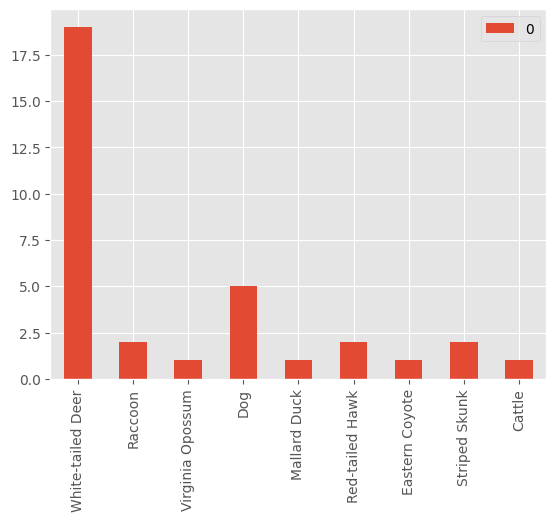

In [45]:
df_esuresp = pd.DataFrame.from_dict(species_dict,orient='index')
df_esuresp[df_esuresp[0]>0].plot(kind='bar')

### Bar chart of species with highest ESU and Police Response counts 

In [48]:
species_res = df_res.index.unique().tolist()
species_res
species_dict= dict()

for x in species_res: 
    df_tmp = (df_res[df_res.index == x])
    species_dict[x] = [len(df_tmp[df_tmp['ESU Response'] == True]) , len(df_tmp[df_tmp['Police Response'] == True])]
species_dict

{'Chukar': [0, 0],
 'Sparrow': [0, 0],
 'White-tailed Deer': [19, 15],
 'Raccoon': [2, 24],
 'Virginia Opossum': [1, 1],
 'Domestic Duck': [0, 0],
 'Canada Goose': [0, 0],
 'Cat': [0, 3],
 'Dog': [5, 13],
 'Eastern Rat Snake': [0, 0],
 'Eastern Gray Squirrel': [0, 1],
 'Domestic Rabbit': [0, 0],
 'Northern Cardinal': [0, 0],
 'Mallard Duck': [1, 0],
 'Double-crested Cormorant': [0, 0],
 'Common Snapping Turtle': [0, 0],
 'Chicken': [0, 0],
 'Argentine Black and White Tegu': [0, 0],
 'American Kestrel': [0, 0],
 'Red-tailed Hawk': [2, 6],
 'Rock Dove': [0, 0],
 'Catfish': [0, 0],
 'Red-Eared Slider': [0, 0],
 'Bat (Unknown)': [0, 0],
 'Common Grackle': [0, 0],
 'Herring Gull': [0, 0],
 'Laughing Gull': [0, 0],
 'Diamondback Terrapin': [0, 0],
 'Red-eared Slider': [0, 0],
 'Raptor (Unknown)': [0, 0],
 'Blue Jay': [0, 0],
 'Barn Swallow': [0, 0],
 'Bird (Unknown)': [0, 0],
 'Mute Swan': [0, 0],
 'Wood Duck': [0, 0],
 'Turtle (Unknown)': [0, 0],
 'Spiny Softshell Turtle': [0, 0],
 'Warblin

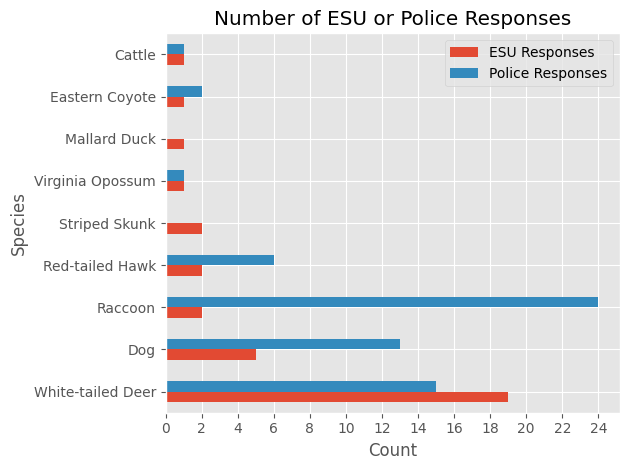

In [113]:
#create our dataframe of esu/police responses 
df_res = df[['Species Description','ESU Response','Police Response']]
df_res = df_res.set_index('Species Description')
df_res

species = df_res.index.unique().tolist()
species_dict= dict()

for x in species: 
    df_tmp = (df_res[df_res.index == x])
    species_dict[x] = [df_tmp['ESU Response'].sum(), df_tmp['Police Response'].sum()]
species_dict

df_res_final = pd.DataFrame.from_dict(species_dict,orient='index',columns=['ESU Responses','Police Responses'])
df_res_final.replace(np.nan,0)
df_res_final.nlargest(9, 'ESU Responses').plot(kind='barh',
                                              xticks=range(0,26,2),
                                               title='Number of ESU or Police Responses',
                                               ylabel='Species',
                                               xlabel='Count')
plt.tight_layout()
plt.savefig('responses_barchart.png')
plt.show()

Make a waffle chart that shows the proportion of ESU Responses/Police Responses out of total number of calls for a particular species (start with raccoons)

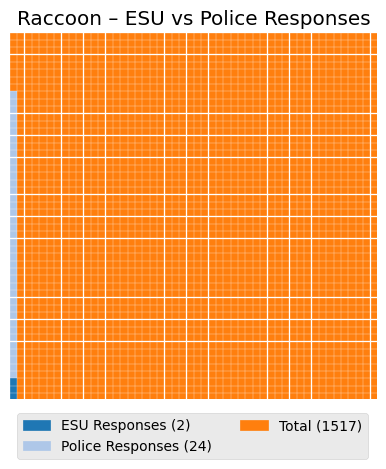

In [124]:
# Filter df for raccoon rows
df_raccoon = df[df["Species Description"].str.contains("raccoon", case=False, na=False)]

# Count ESU and Police responses
esu_count = df_raccoon["ESU Response"].sum()       # True counts
police_count = df_raccoon["Police Response"].sum() # True counts
total = len(df_raccoon)

# Put into dict for PyWaffle
values = {
    "ESU Responses": esu_count,
    "Police Responses": police_count ,
    "Total": total
}

# Create waffle chart
fig = plt.figure(
    FigureClass=Waffle,
    rows=50, columns=50,
    values=values,
    #colors=["#1f77b4", "#ff7f0e","],  
    cmap_name ='tab20',
    legend={
        'loc': 'center left',
        'bbox_to_anchor': (0, -0.1),
        'ncol': 2,
        'labels': [f"{k} ({v})" for k, v in values.items()]
    }
)
plt.title("Raccoon – ESU vs Police Responses")
plt.tight_layout()
plt.savefig('raccoon_responses_waffle.png')
plt.show()

In [17]:
df.loc[(df["Species Description"] == 'Raccoon') & (df["Police Response"] == True)] 

,Date and Time of initial call,Date and time of Ranger response,Borough,Property,Location,Species Description,Call Source,Species Status,Animal Condition,Duration of Response,...,311SR Number,Final Ranger Action,# of Animals,PEP Response,Animal Monitored,Rehabilitator,Hours spent monitoring,Police Response,ESU Response,ACC Intake Number
1170,2022-03-25 09:20:00,2022-03-25 09:52:00,Queens,Farm Playground,Corridor at northern edge of playground,Raccoon,Other,Native,Unhealthy,1.75,...,311-09763919,ACC,1.0,False,True,NaN,0.25,True,False,NaN
1617,2020-10-25 14:00:00,2020-10-25 14:15:00,Manhattan,Central Park,"Behind north meadow Rec Center, Near Ballfield...",Raccoon,Employee,Native,Healthy,1.00,...,NaN,Monitored Animal,1.0,False,True,NaN,NaN,True,False,NaN
1755,2020-09-06 14:45:00,2020-09-06 15:10:00,Bronx,Pelham Bay Park,Orchard Beach Basketball Courts,Raccoon,Employee,Native,Healthy,1.00,...,NaN,Advised/Educated others,1.0,False,True,NaN,1.00,True,True,NaN
2550,2019-07-27 12:30:00,2019-07-27 12:40:00,Manhattan,Randall's Island Park,N/a,Raccoon,Central,Native,NaN,0.25,...,NaN,Advised/Educated others,1.0,False,False,NaN,NaN,True,False,NaN
2658,2019-06-05 11:00:00,2019-06-05 11:20:00,Brooklyn,Dyker Beach Park,"Dyker 14th Ballfields; 40.613081, -74.014714",Raccoon,Employee,Native,Unhealthy,2.00,...,1-1-1728538570,ACC,1.0,False,False,NaN,NaN,True,False,64980
2773,2019-03-31 08:00:00,2019-03-31 09:50:00,Brooklyn,Saratoga Park,East entrance directly across from 55 Saratoga...,Raccoon,Central,Native,Unhealthy,1.50,...,NaN,Unfounded,0.0,False,False,NaN,NaN,True,False,NaN
2775,2019-03-30 14:45:00,2019-03-30 15:05:00,Queens,College Point Park,"College Point Blvd & 14th Ave (40.7855485,-73....",Raccoon,Employee,Native,Unhealthy,1.50,...,1-1-1694669765,Unfounded,0.0,False,False,NaN,NaN,True,False,NaN
2866,2019-02-18 09:45:00,2019-02-18 10:00:00,Brooklyn,Prospect Park,"Center Drive/West Drive (40.6582102,-73.9739795)",Raccoon,"Conservancies/""Friends of"" Groups",Native,Unhealthy,2.00,...,1-1-1682001290,ACC,1.0,False,False,NaN,NaN,True,False,55148
3132,2018-10-21 08:45:00,2018-10-21 09:00:00,Brooklyn,Prospect Park,Grand Army Plaza at East Drive and Flatbush Av...,Raccoon,Central,Native,Injured,2.50,...,1-1-1629918870,ACC,1.0,False,False,NaN,NaN,True,False,45120
3154,2018-10-15 07:58:00,2018-10-15 09:15:00,Brooklyn,Prospect Park,Parade Grounds,Raccoon,Central,Native,Unhealthy,2.00,...,1-1-626701740,ACC,1.0,False,False,NaN,NaN,True,False,44534


In [19]:
df.loc[(df["Species Description"] == 'Raccoon') & (df["Police Response"] == True),"Final Ranger Action"].value_counts()

Final Ranger Action
ACC                              13
Unfounded                         4
Monitored Animal                  3
Advised/Educated others           2
Relocated/Condition Corrected     2
Name: count, dtype: int64

In [23]:
df.loc[3411]

Date and Time of initial call                                     2018-08-09 07:30:00
Date and time of Ranger response                                  2018-08-09 09:00:00
Borough                                                                     Manhattan
Property                                                                 Central Park
Location                            E 102nd St and East Drive.  South of Compost Hill
Species Description                                                           Raccoon
Call Source                                         Conservancies/"Friends of" Groups
Species Status                                                                 Native
Animal Condition                                                            Unhealthy
Duration of Response                                                              4.0
Age                                                                             Adult
Animal Class                                          

## Sankey diagram: Condition vs Outcome 

Made one in tableu in 5 seconds (2025-12-02 12:36) 

In [17]:
df.loc[df["Final Ranger Action"] == "Rehabilitator" ,"Animal Condition"].value_counts()

Animal Condition
Injured      447
Unhealthy    220
Healthy      123
DOA            2
Name: count, dtype: int64

In [18]:
df.loc[(df["Final Ranger Action"] == "Rehabilitator") & (df["Animal Condition"] =="DOA")]

,Date and Time of initial call,Date and time of Ranger response,Borough,Property,Location,Species Description,Call Source,Species Status,Animal Condition,Duration of Response,...,311SR Number,Final Ranger Action,# of Animals,PEP Response,Animal Monitored,Rehabilitator,Hours spent monitoring,Police Response,ESU Response,ACC Intake Number
3748,2022-07-17 12:10:00,2022-07-17 12:45:00,Brooklyn,Benson Playground,62nd Police Precinct,Great Horned Owl,Other,Native,DOA,1.0,...,311-11051609,Rehabilitator,1.0,False,False,Wild Bird Fund,NaN,False,False,NaN
4956,2023-06-08 10:20:00,2023-06-08 10:45:00,Manhattan,Central Park,"59th Street & 7th Avenue, inside the park",Red-tailed Hawk,WBF,Native,DOA,0.5,...,311-14747847,Rehabilitator,1.0,False,False,Wild Bird Fund,NaN,False,False,NaN
